In [2]:
!pip install fuzzy-c-means

  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
bigframes 0.19.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [3]:
import numpy as np
from PIL import Image
from fcmeans import FCM

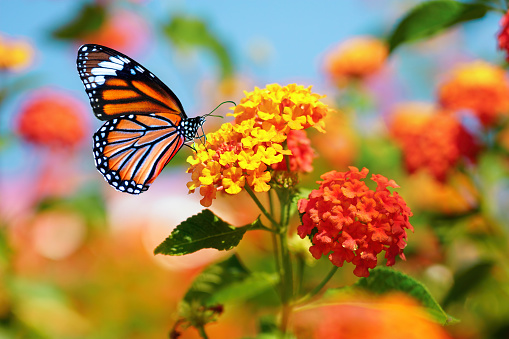

In [5]:
image = Image.open('Butterfly.jpg')
N, M = image.size
image

In [11]:
#Transforming image into a data set
X = (np.asarray(image).reshape((N*M, 3)))

In [7]:
fcm = FCM(n_clusters=10)
fcm.fit(X)

In [12]:
#Pixel quantization
labeld_X = fcm.predict(X)
transformed_X = fcm.centers[labeld_X]

In [13]:
#Converting and saving image
quatized_array = (transformed_X.astype('uint8').reshape((M, N, 3)))                   # convert data points into 8-bit unsigned integers
quatized_image = Image.fromarray(np.asarray(quatized_array))
quatized_image.save('color.jpg') # save image

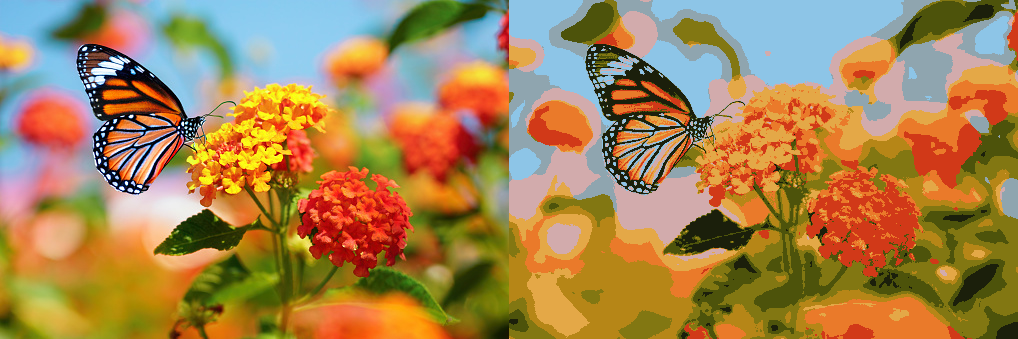

In [14]:
side_by_side = Image.fromarray(np.hstack([np.array(image), np.array(quatized_image)]))
side_by_side